<a href="https://colab.research.google.com/github/Amit-Padye/Insurance-Decisioning/blob/main/CH_Amit_Padye_Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

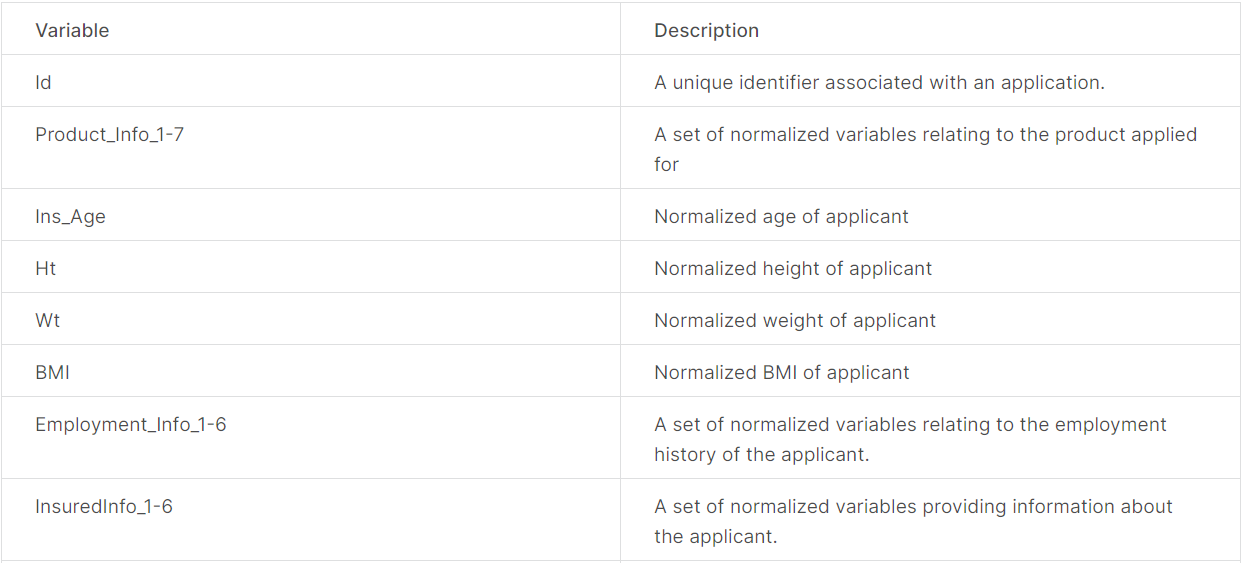

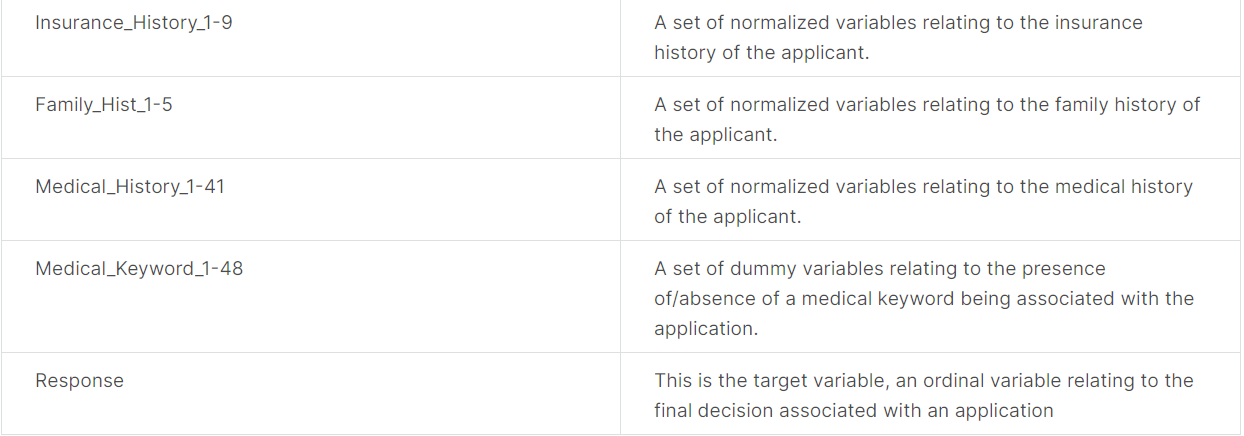

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/analytic/self project/test.csv")
train=pd.read_csv("/content/drive/MyDrive/analytic/self project/train.csv")

In [ ]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.666667,NaN,0.661972,NaN,3.0,132,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,0.000667,2,1,2,2,NaN,0.686275,0.676056,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.449275,NaN,0.380282,NaN,18.0,181,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.Product_Info_2.value_counts()

D3    4432
D4    3259
A8    2305
D2    2058
D1    2057
A2    1098
E1    1064
A1     856
A6     635
A3     587
A7     440
B2     324
A5     234
C3     131
C1      92
C4      72
A4      53
C2      37
B1      31
Name: Product_Info_2, dtype: int64

In [ ]:
df.drop('Product_Info_2',axis=1,inplace=True)
train.drop('Product_Info_2',axis=1,inplace=True)

In [ ]:
train.iloc[:,0:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_1    59362 non-null  float64
 13  Employment_Info_2    59381 non-null  int64  
 14  Employment_Info_3    59381 non-null  int64  
 15  Employment_Info_4    52602 non-null 

#Let's analyse first 40 features

In [ ]:
d=train.iloc[:,0:40].isnull().sum().to_frame()
d[d[0]!=0]

,0


In [ ]:
d=df.iloc[:,0:40].isnull().sum().to_frame()
d[d[0]!=0]

,0
Employment_Info_1,3
Employment_Info_4,2137
Employment_Info_6,3787
Insurance_History_5,8105
Family_Hist_2,9880
Family_Hist_3,11064
Family_Hist_4,6677
Family_Hist_5,13624
Medical_History_1,2972


###Employment_Info_1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


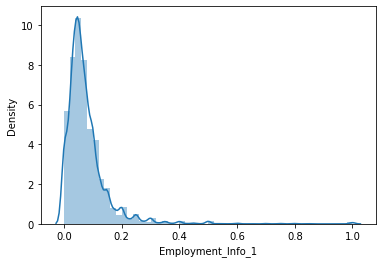

In [ ]:
sns.distplot(train['Employment_Info_1'])

In [ ]:
train['Employment_Info_1'].mean()

0.07758209953084522

In [ ]:
train['Employment_Info_1'].fillna(train['Employment_Info_1'].mean,inplace=True)
df['Employment_Info_1'].fillna(train['Employment_Info_1'].mean,inplace=True)

###Employment_Info_4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


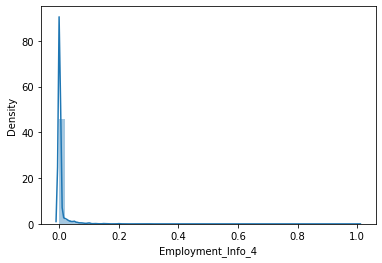

In [ ]:
sns.distplot(train['Employment_Info_4'])

In [ ]:
train['Employment_Info_4'].median()

0.0

In [ ]:
train['Employment_Info_4'].fillna(train['Employment_Info_4'].mean,inplace=True)
df['Employment_Info_4'].fillna(train['Employment_Info_4'].mean,inplace=True)

###Employment_Info_6

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


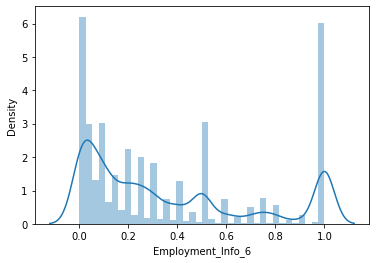

In [ ]:
sns.distplot(train['Employment_Info_6'])

In [ ]:
train['Employment_Info_6'].fillna(0.5,inplace=True)
df['Employment_Info_6'].fillna(0.5,inplace=True)

###Insurance_History_5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


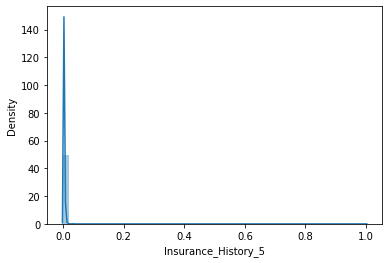

In [ ]:
sns.distplot(train['Insurance_History_5'])

In [ ]:
train['Insurance_History_5'].fillna(0,inplace=True)
df['Insurance_History_5'].fillna(0,inplace=True)

###Family_Hist_2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


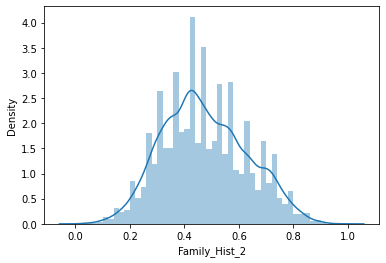

In [ ]:
sns.distplot(train['Family_Hist_2'])

In [ ]:
train['Family_Hist_2'].mean()

0.4745500642717966

In [ ]:
train['Family_Hist_2'].fillna(train['Family_Hist_2'].mean(),inplace=True)
df['Family_Hist_2'].fillna(train['Family_Hist_2'].mean(),inplace=True)

###Family_Hist_3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


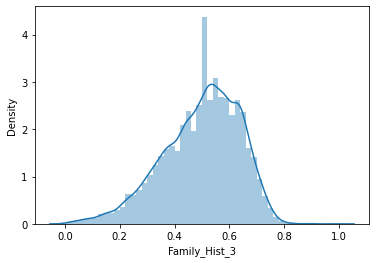

In [ ]:
sns.distplot(train['Family_Hist_3'])

In [ ]:
train['Family_Hist_3'].mean()

0.4977373765798313

In [ ]:
train['Family_Hist_3'].fillna(train['Family_Hist_3'].mean(),inplace=True)
df['Family_Hist_3'].fillna(train['Family_Hist_3'].mean(),inplace=True)

###Family_Hist_4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


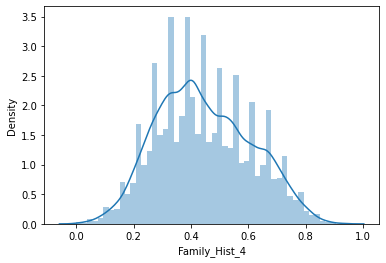

In [ ]:
sns.distplot(train['Family_Hist_4'])

In [ ]:
train['Family_Hist_4'].mean()

0.444890253537949

In [ ]:
train['Family_Hist_4'].fillna(train['Family_Hist_4'].mean(),inplace=True)
df['Family_Hist_4'].fillna(train['Family_Hist_4'].mean(),inplace=True)

###Family_Hist_5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


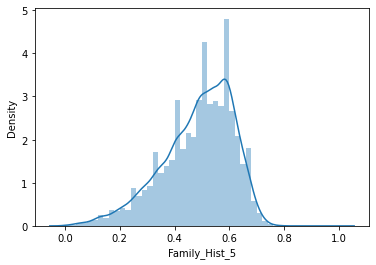

In [ ]:
sns.distplot(train['Family_Hist_5'])

In [ ]:
train['Family_Hist_5'].mean()

0.48463492966551047

In [ ]:
train['Family_Hist_5'].fillna(train['Family_Hist_5'].mean(),inplace=True)
df['Family_Hist_5'].fillna(train['Family_Hist_5'].mean(),inplace=True)

###Medical_History_1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


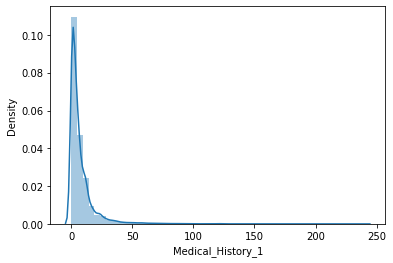

In [ ]:
sns.distplot(train['Medical_History_1'])

In [ ]:
train['Medical_History_1'].median()

4.0

In [ ]:
train['Medical_History_1'].fillna(train['Medical_History_1'].median(),inplace=True)
df['Medical_History_1'].fillna(train['Medical_History_1'].median(),inplace=True)

#column 40 to 80

In [ ]:
dt=train.iloc[:,40:80].isnull().sum().to_frame()
a=dt[dt[0]!=0]
a

,0
Medical_History_10,58824
Medical_History_15,44596
Medical_History_24,55580
Medical_History_32,58274


In [ ]:
list(a.index)

['Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [ ]:
train.iloc[:,40:80].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Medical_History_3   59381 non-null  int64  
 1   Medical_History_4   59381 non-null  int64  
 2   Medical_History_5   59381 non-null  int64  
 3   Medical_History_6   59381 non-null  int64  
 4   Medical_History_7   59381 non-null  int64  
 5   Medical_History_8   59381 non-null  int64  
 6   Medical_History_9   59381 non-null  int64  
 7   Medical_History_10  557 non-null    float64
 8   Medical_History_11  59381 non-null  int64  
 9   Medical_History_12  59381 non-null  int64  
 10  Medical_History_13  59381 non-null  int64  
 11  Medical_History_14  59381 non-null  int64  
 12  Medical_History_15  14785 non-null  float64
 13  Medical_History_16  59381 non-null  int64  
 14  Medical_History_17  59381 non-null  int64  
 15  Medical_History_18  59381 non-null  int64  
 16  Medi

In [ ]:
d=df.iloc[:,40:80].isnull().sum().to_frame()
d[d[0]!=0]

,0
Medical_History_10,19564
Medical_History_15,14864
Medical_History_24,18585
Medical_History_32,19414


In [ ]:
df.iloc[:,40:80].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Medical_History_3   19765 non-null  int64  
 1   Medical_History_4   19765 non-null  int64  
 2   Medical_History_5   19765 non-null  int64  
 3   Medical_History_6   19765 non-null  int64  
 4   Medical_History_7   19765 non-null  int64  
 5   Medical_History_8   19765 non-null  int64  
 6   Medical_History_9   19765 non-null  int64  
 7   Medical_History_10  201 non-null    float64
 8   Medical_History_11  19765 non-null  int64  
 9   Medical_History_12  19765 non-null  int64  
 10  Medical_History_13  19765 non-null  int64  
 11  Medical_History_14  19765 non-null  int64  
 12  Medical_History_15  4901 non-null   float64
 13  Medical_History_16  19765 non-null  int64  
 14  Medical_History_17  19765 non-null  int64  
 15  Medical_History_18  19765 non-null  int64  
 16  Medi

In [ ]:
train.drop(list(a.index), axis=1, inplace=True)
df.drop(list(a.index), axis=1, inplace=True)

#columns 80 to 127

In [ ]:
d=train.iloc[:,80:].isnull().sum().to_frame()
d[d[0]!=0]

,0


In [ ]:
d=df.iloc[:,80:].isnull().sum().to_frame()
d[d[0]!=0]

,0


In [ ]:
d=train.isnull().sum().to_frame()
d[d[0]!=0]

,0


In [ ]:
d=df.isnull().sum().to_frame()
d[d[0]!=0]

,0


In [ ]:
tra

#Let's Train Model !!!!!

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
x=train.drop('Response',axis=1)
y=train['Response']

In [ ]:
train.select_dtypes(['object'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.10)

In [ ]:
y_train

In [ ]:

clf = LogisticRegression()
clf.fit(x_train, y_train)

TypeError: ignored